In [1]:
import pandas as pd

sp=pd.read_csv("SpendData.csv")  #loading the SpenData.csv dataset

In [5]:
print(sp.tail)

<bound method NDFrame.tail of        Unnamed: 0  month  var8  var6  a.1  a.2  a.3  a.4  var5  b.5  ...  \
0               1      1   2.0   NaN    1    5    1   57    34    1  ...   
1               2      1   2.0   NaN    1    4    1   57    34    2  ...   
2               3      1   2.0   NaN    1    5    1   57    42    2  ...   
3               4      1   2.0   NaN    1    6    1   57    34    2  ...   
4               5      1   2.0   NaN    1    8    1   22     1    1  ...   
...           ...    ...   ...   ...  ...  ...  ...  ...   ...  ...  ...   
18374       22970     12   NaN   NaN    1    3    1   58    20    2  ...   
18375       22971     12   NaN   NaN    1    3    1  123    31    1  ...   
18376       22972     12   NaN   NaN    1    5    1   44    21    2  ...   
18377       22973     12   NaN   NaN    1    4    1   44    21    1  ...   
18378       22974     12   3.0   NaN    1    6    1   10    33    1  ...   

       c.276  c.277  c.278  c.279  c.280  c.281  c.282  c

In [6]:
sp.std() #to find the standard deviation of all columns

Unnamed: 0    6645.173397
month            3.468736
var8             0.845175
var6             0.812020
a.1              0.000000
                 ...     
c.281            0.192067
c.282            0.255746
c.283            0.131801
f.284            1.247728
t.158                 NaN
Length: 299, dtype: float64

In [7]:
sp.dtypes #to find out datatype of each columns

Unnamed: 0      int64
month           int64
var8          float64
var6          float64
a.1             int64
               ...   
c.281           int64
c.282           int64
c.283           int64
f.284         float64
t.158         float64
Length: 301, dtype: object

In [18]:
pd.options.display.max_rows = len(sp.columns)
print(sp.columns.to_series().reset_index(drop=True))  #used to list all the columns present in the dataset

0           Unnamed: 0
1                month
2                 var8
3                 var6
4                  a.1
5                  a.2
6                  a.3
7                  a.4
8                 var5
9                  b.5
10                 b.6
11                 b.7
12                 b.8
13                 b.9
14                b.10
15                b.11
16                b.12
17                b.13
18                b.14
19                b.15
20                b.16
21                b.17
22                b.18
23                b.19
24                b.20
25                b.21
26                b.22
27                pov6
28                b.23
29                b.24
30                b.25
31                b.26
32                b.27
33                b.28
34                c.29
35                c.30
36                var7
37                c.31
38                c.32
39                c.33
40                c.34
41                c.35
42                c.36
43         

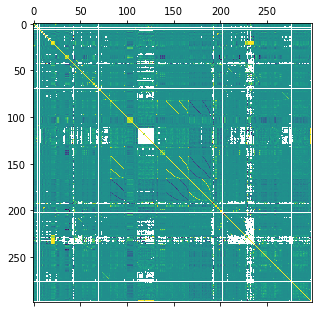

In [199]:
import matplotlib.pyplot as plt


plt.figure(figsize=(5,5))
plt.matshow(sp.corr(), fignum=1)  #used to plot correlation matrix, to find the correlation b/w columns
plt.show()

In [21]:
sp.nunique()   #to count no. of unique objects in each col.
 

Unnamed: 0         18379
month                 12
var8                   3
var6                   4
a.1                    1
a.2                   12
a.3                    1
a.4                  111
var5                  50
b.5                    2
b.6                    4
b.7                    3
b.8                    5
b.9                    2
b.10                  50
b.11                  42
b.12                   2
b.13                  38
b.14                  41
b.15                  49
b.16                  49
b.17                  49
b.18                  49
b.19                  13
b.20                   6
b.21                  47
b.22                  52
pov6                   6
b.23                  44
b.24                  37
b.25                  31
b.26                  25
b.27                   9
b.28                   2
c.29                   2
c.30                   2
var7                   3
c.31                   2
c.32                   2
c.33                   2


In [200]:
import pandas as pd
sp=pd.read_csv("SpendData.csv")

counts = sp.nunique()
del_col = [i for i,v in enumerate(counts) if v <= 5] #deleting single value columns (~zero-variance)

op=sp.drop(sp.columns[del_col],axis=1)
print(sp.shape)
print(op)

(18379, 301)
       Unnamed: 0  month  a.2  a.4  var5   b.10  b.11  b.13  b.14  b.15  ...  \
0               1      1    5   57    34    NaN   NaN   NaN   NaN     6  ...   
1               2      1    4   57    34    NaN   NaN   NaN   NaN    50  ...   
2               3      1    5   57    42   93.0   1.0  93.0  60.0     6  ...   
3               4      1    6   57    34    NaN   NaN   NaN   NaN     7  ...   
4               5      1    8   22     1  102.0   0.0  93.0   3.0     2  ...   
...           ...    ...  ...  ...   ...    ...   ...   ...   ...   ...  ...   
18374       22970     12    3   58    20    NaN   NaN   NaN   NaN     4  ...   
18375       22971     12    3  123    31    NaN   NaN   NaN   NaN     6  ...   
18376       22972     12    5   44    21    NaN   NaN   NaN   NaN     4  ...   
18377       22973     12    4   44    21    NaN   NaN   NaN   NaN     4  ...   
18378       22974     12    6   10    33    NaN   NaN   NaN   NaN     1  ...   

       b.195  c.214  c.215

>Threshold=0.00, Features=134
>Threshold=0.25, Features=134
>Threshold=0.50, Features=134
>Threshold=0.75, Features=131
>Threshold=1.00, Features=130
>Threshold=1.25, Features=126
>Threshold=1.50, Features=124
>Threshold=1.75, Features=123


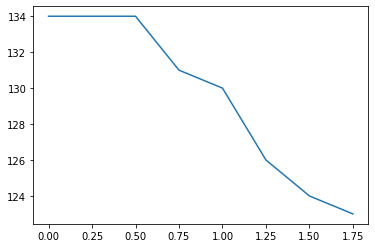

In [201]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

thresholds = arange(0.0, 2.0, 0.25) #thresholds defined to check
results = list()
for t in thresholds:
    transform = VarianceThreshold(threshold=t) # define the transform
    X_sel = transform.fit_transform(op) # transform the input data
    n_features = X_sel.shape[1] # to determine the number of input features
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    results.append(n_features)

pyplot.plot(thresholds, results) # plotting threshold vs the number of selected features
pyplot.show()

In [38]:
print(X_sel)

[[1 1 5 ... nan nan nan]
 [2 1 4 ... 50.0 nan 0.0]
 [3 1 5 ... 6.0 nan 500.0]
 ...
 [22972 12 5 ... nan nan 0.0]
 [22973 12 4 ... nan nan 0.0]
 [22974 12 6 ... nan nan 0.0]]


In [34]:
pd.options.display.max_rows = len(op.columns)
print(op.columns.to_series().reset_index(drop=True)) #listing all columns to check

0           Unnamed: 0
1                month
2                  a.2
3                  a.4
4                 var5
5                 b.10
6                 b.11
7                 b.13
8                 b.14
9                 b.15
10                b.16
11                b.17
12                b.18
13                b.19
14                b.20
15                b.21
16                b.22
17                pov6
18                b.23
19                b.24
20                b.25
21                b.26
22                b.27
23                c.36
24                c.37
25                c.39
26                c.40
27                c.41
28                c.42
29                c.43
30                c.44
31                c.46
32                c.47
33                c.48
34                c.50
35                c.52
36                c.54
37                c.56
38                c.57
39                c.58
40                c.59
41                c.60
42                c.61
43         

In [202]:
def variance_threshold_selector(data, t):
    selector = VarianceThreshold(threshold=t)
    selector.fit(data)
    data_transformed = data.loc[:, selector.get_support()]
    return data_transformed
    
vts=variance_threshold_selector(op, 0.7204)  #using variance threshold selector to remove zero/low variance feature.
print(vts.nunique())

Unnamed: 0         18379
month                 12
a.2                   12
a.4                  111
var5                  50
b.10                  50
b.11                  42
b.13                  38
b.14                  41
b.15                  49
b.16                  49
b.17                  49
b.18                  49
b.19                  13
b.21                  47
b.22                  52
pov6                   6
b.23                  44
b.24                  37
b.25                  31
b.26                  25
b.27                   9
c.36                  88
c.37                   7
c.39                1869
c.40                 105
c.41                   6
c.42                  31
c.43                  90
c.44                  38
c.46                  15
c.47                1979
c.48                  22
c.50                 226
c.52                 224
c.54                  89
c.56                  19
c.57                 489
c.58                 209
c.59                 209


In [203]:
vts.describe()

,Unnamed: 0,month,a.2,a.4,var5,b.10,b.11,b.13,b.14,b.15,...,b.195,c.214,c.215,c.217,c.218,c.219,c.221,c.222,c.223,c.250
count,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,2372.000000,2372.00000,6696.000000,6459.000000,18379.000000,...,3774.000000,13023.000000,231.000000,115.000000,291.000000,82.000000,29.000000,3367.000000,87.000000,18158.000000
mean,11501.723326,6.504054,6.339681,56.685130,25.217966,133.387437,5.12226,127.569743,5.033132,3.418956,...,1.103869,3.219765,2.246753,4.156522,3.099656,9.768293,6.482759,5.014256,6.057471,117.680912
std,6645.173397,3.468736,2.450582,36.091902,10.631883,53.222558,9.67255,54.316863,11.712429,3.309316,...,7.676284,1.695328,1.093330,3.079620,3.164518,13.889599,6.775063,5.442928,7.317320,822.006741
min,1.000000,1.000000,1.000000,2.000000,1.000000,12.000000,0.00000,12.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,5729.500000,4.000000,4.000000,25.000000,20.000000,94.000000,2.00000,94.000000,3.000000,2.000000,...,0.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,0.000000
50%,11514.000000,7.000000,6.000000,57.000000,24.000000,121.000000,3.00000,121.000000,4.000000,3.000000,...,0.000000,3.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,17293.500000,9.000000,8.000000,65.000000,30.000000,200.000000,5.00000,187.000000,5.000000,4.000000,...,0.000000,4.000000,3.000000,4.000000,3.000000,11.500000,6.000000,6.000000,6.500000,0.000000
max,22974.000000,12.000000,12.000000,137.000000,50.000000,226.000000,150.00000,226.000000,650.000000,60.000000,...,259.000000,46.000000,8.000000,27.000000,30.000000,60.000000,29.000000,60.000000,60.000000,30000.000000


In [204]:
missing_values_count = vts.isnull().sum() #to count the missing values in each columns
print(missing_values_count)

Unnamed: 0             0
month                  0
a.2                    0
a.4                    0
var5                   0
b.10               16007
b.11               16007
b.13               11683
b.14               11920
b.15                   0
b.16                   0
b.17                   0
b.18                   0
b.19                   0
b.21               15098
b.22                   0
pov6                   0
b.23                   0
b.24                   0
b.25                   0
b.26                   0
b.27                   0
c.36               18148
c.37               18372
c.39                5359
c.40                   0
c.41                   0
c.42                   0
c.43                   0
c.44                   0
c.46                   0
c.47                   0
c.48                4475
c.50                   0
c.52                   0
c.54                   0
c.56                   0
c.57                   0
c.58                   0
c.59                   0


In [205]:
vts.isnull().mean() #finding missing value mean for all columns

Unnamed: 0         0.000000
month              0.000000
a.2                0.000000
a.4                0.000000
var5               0.000000
b.10               0.870940
b.11               0.870940
b.13               0.635671
b.14               0.648566
b.15               0.000000
b.16               0.000000
b.17               0.000000
b.18               0.000000
b.19               0.000000
b.21               0.821481
b.22               0.000000
pov6               0.000000
b.23               0.000000
b.24               0.000000
b.25               0.000000
b.26               0.000000
b.27               0.000000
c.36               0.987431
c.37               0.999619
c.39               0.291583
c.40               0.000000
c.41               0.000000
c.42               0.000000
c.43               0.000000
c.44               0.000000
c.46               0.000000
c.47               0.000000
c.48               0.243484
c.50               0.000000
c.52               0.000000
c.54               0

In [206]:
trans_cl=vts[vts.columns[vts.isnull().mean() < 0.002244]] #removing missing value columns upto certain mean threshold
missing_values_count = trans_cl.isnull().sum()
print(missing_values_count)
print(trans_cl)

Unnamed: 0         0
month              0
a.2                0
a.4                0
var5               0
b.15               0
b.16               0
b.17               0
b.18               0
b.19               0
b.22               0
pov6               0
b.23               0
b.24               0
b.25               0
b.26               0
b.27               0
c.40               0
c.41               0
c.42               0
c.43               0
c.44               0
c.46               0
c.47               0
c.50               0
c.52               0
c.54               0
c.56               0
c.57               0
c.58               0
c.59               0
c.62               0
c.65               0
c.66               0
c.68               0
c.69               0
c.70               0
c.71               0
c.72               0
c.73               0
c.74               0
c.75               0
c.76               0
c.78               0
c.79               0
c.80               0
c.81               0
c.82         

In [210]:
for column in ['c.140', 'c.141', 'c.145', 'c.147', 'c.148', 't7.153', 't7.154', 't7.157']:
    trans_cl[column].fillna(trans_cl[column].mode(), inplace=True)            #imputing mode values for columns with very less missing values.

In [211]:
missing_values_count = trans_cl.isnull().sum() #counting missing value in all columns
print(missing_values_count)

Unnamed: 0         0
month              0
a.2                0
a.4                0
var5               0
b.15               0
b.16               0
b.17               0
b.18               0
b.19               0
b.22               0
pov6               0
b.23               0
b.24               0
b.25               0
b.26               0
b.27               0
c.40               0
c.41               0
c.42               0
c.43               0
c.44               0
c.46               0
c.47               0
c.50               0
c.52               0
c.54               0
c.56               0
c.57               0
c.58               0
c.59               0
c.62               0
c.65               0
c.66               0
c.68               0
c.69               0
c.70               0
c.71               0
c.72               0
c.73               0
c.74               0
c.75               0
c.76               0
c.78               0
c.79               0
c.80               0
c.81               0
c.82         

In [212]:
trans_cl.to_csv("Cleaned.csv",index=None)  #saving the cleaned data in .csv

In [213]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.model_selection import train_test_split


X = trans_cl.drop(['respondent.id','pov6'], axis=1)   
y = trans_cl['pov6'] #target attribute

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True) #splitting the data into train and test

print(X.columns)
print(y)

Index(['Unnamed: 0', 'month', 'a.2', 'a.4', 'var5', 'b.15', 'b.16', 'b.17',
       'b.18', 'b.19', 'b.22', 'b.23', 'b.24', 'b.25', 'b.26', 'b.27', 'c.40',
       'c.41', 'c.42', 'c.43', 'c.44', 'c.46', 'c.47', 'c.50', 'c.52', 'c.54',
       'c.56', 'c.57', 'c.58', 'c.59', 'c.62', 'c.65', 'c.66', 'c.68', 'c.69',
       'c.70', 'c.71', 'c.72', 'c.73', 'c.74', 'c.75', 'c.76', 'c.78', 'c.79',
       'c.80', 'c.81', 'c.82', 'c.83', 'c.84', 'c.85', 'c.86', 'c.87', 'c.88',
       'c.89', 'c.90', 'c.91', 'f.104', 'a.124', 'var3', 'c.127', 'pp.128',
       'pp.129', 'pp.130', 'pp.131', 'pp.132', 'pp.133', 'pp.134', 'c.136',
       'c.137', 'c.138', 'c.139', 'c.140', 'c.141', 'c.142', 'c.143', 'c.144',
       'c.145', 'c.146', 'c.147', 'c.148', 't7.150', 't7.151', 't7.152',
       't7.153', 't7.154', 't7.155', 't7.156', 't7.157', 'a.186', 'var2',
       'totshopping.rep', 'var0', 'b.194'],
      dtype='object')
0        1
1        1
2        1
3        1
4        2
        ..
18374    1
18375   

In [214]:
classifiers=list()  #initializing classifiers to check the accuracy and confusion matrix of few classifier models
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = KNeighborsClassifier()
classifiers.append(model5)

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))  
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is 0.9495828799419659
Confusion Matrix of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is [[419

In [215]:
model = xgboost.XGBClassifier()  #selecting xgbclassifier as the model with 95% accuracy after training
model.fit(X_train, y_train) #fitting the data into the model
print(model)
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred] #predicting the groups
accuracy = accuracy_score(y_test, predictions) #calculating the accuracy of the result
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy: 94.96%


In [216]:
print(predictions) #printing the results

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 6, 1, 1, 2, 1, 1, 2, 5, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 6, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 

In [217]:
result=pd.DataFrame(predictions,columns=["Group"])
result.to_csv("resultbbi.csv") #saving the results in .csv